In [644]:

import json
# Calculate the Euclidean distance
# between two points
from functools import reduce
from textwrap import wrap

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


def distance_2d(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)


# Function to calculate K closest points
def kClosest(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance_2d(points[i][0], points[i][1], target[0], target[1]),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    for i in range(K):
        pt = []
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        pt.append(points[d[i]["second"]][0])
        pt.append(points[d[i]["second"]][1])
        pts.append(pt)

    return dict(zip(position, dist))






In [645]:

# Function to calculate K closest points
from scipy.spatial import distance


def kClosest_high(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance.cosine(points[i], target),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    pt = []
    for i in range(K):
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        # pt.append(points[d[i]["second"]])
    return dict(zip(position, dist))

In [649]:
def load_points(model, article, k):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)
    target = data[article]
    articles_title = list(data.keys())
    corpus_embedding = list(data.values())
    closest_points = kClosest_high(corpus_embedding, target, k)
    near_values = {}
    for k in closest_points.keys():
        # if closest_points[k] != 0:
        near_values[articles_title[k]] = closest_points[k]
    return near_values

In [650]:
def draw_plot(target_title, K):
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'biowordvec',
    #           'generic_fasttext']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'BioWordVec',
    #           'Generic fastText']
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'pubmedbert', 'biowordvec', 'generic_fasttext', 'tfidf', 'bow']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT', 'Avg. BioWordVec', 'Avg. Generic fastText',
    #                'TFIDF', 'BOW']
    # models = ['biowordvec', 'generic_fasttext']
    # model_names = ['Avg. BioWordVec', 'Avg. Generic fastText']
    # models = ['allenai_specter','all_mpnet_base_v2']
    model_names = ['all_mpnet_base_v2', 'allenai_specter', 'pubmedbert']
    models = ['all_mpnet_base_v2', 'allenai_specter', 'pubmedbert']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)
    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 40)) for l in allkey]
    fig, ax = plt.subplots(figsize=(6, 8))
    # my_colors = ['#08c45b', '#eded72','#926dd1']
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A, cbar_kws={'label': 'Publication Ranks',
                                                                                        'extend': 'max',
                                                                                        'ticks': [1, 3]},
                     cmap=my_cmap, vmin=1, vmax=3, cbar=True, ax=ax,
                     annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08, linecolor='lightgray')
    # ax = sns.heatmap(B, mask=B < 2, cmap='Blues', annot=A,xticklabels=models, yticklabels=allkey, vmin=0, vmax=1, cbar=False, ax=ax)
    # colorbar = ax.collections[0].colorbar
    # colorbar.set_ticks([1,5])
    # colorbar.set_ticklabels(['1', '4'])
    plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
    plt.show()
    return B

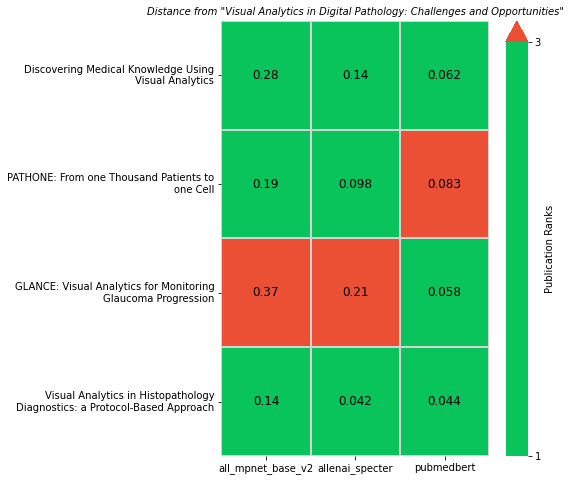

array([[ 3,  3,  3],
       [ 2,  2, 51],
       [ 7, 34,  2],
       [ 1,  1,  1]])

In [651]:
target_title1 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
B = draw_plot(target_title1, 4)
B = np.array(B)
B

In [652]:
def calculate_dist(model, paper, target):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)
    target_emb = data[target]
    paper_emb = data[paper]
    dist = distance.cosine(target_emb, paper_emb)
    return dist



In [653]:
model = "pubmedbert"
target = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
paper1 = "Visual Analytics in Histopathology Diagnostics: a Protocol-Based Approach"
dist = calculate_dist(model, paper1, target)
dist

0.0435785996179644

In [654]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [655]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [656]:
def create_rank_matrix(target_title, K, drawplot=False):
    # models = ['allenai_specter','all_mpnet_base_v2','biowordvec',
    #           'generic_fasttext', 'TFIDF', 'BOW']
    # model_names = ['allenai_specter','all_mpnet_base_v2','BioWordVec',
    #           'Generic fastText','TFIDF','BOW']

    # model_names = ['BioWordVec','Generic fastText']
    models = ['allenai_specter', 'pubmedbert', 'generic_fasttext']
    model_names = ['allenai_specter', 'PubMedBERT', 'Avg. Generic fastText']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 30)) for l in allkey]
    # my_colors = ['#08c45b', '#eded72','#926dd1','#6f6dd1', '#bf62b7']
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        print(allkey)
        fig, ax = plt.subplots(figsize=(6, 8))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                         cbar_kws={'label': 'Publication Ranks',
                                   'extend': 'max',
                                   'ticks': [0, 3]},
                         cmap=my_cmap, vmin=0, vmax=3, cbar=True, ax=ax,
                         annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                         linecolor='lightgray')
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0, 3])
        colorbar.set_ticklabels(['1', '3'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

{'Discovering Medical Knowledge Using Visual Analytics', 'PATHONE: From one Thousand Patients to one Cell', 'GLANCE: Visual Analytics for Monitoring Glaucoma Progression', 'Visual Analytics in Histopathology Diagnostics: a Protocol-Based Approach'}


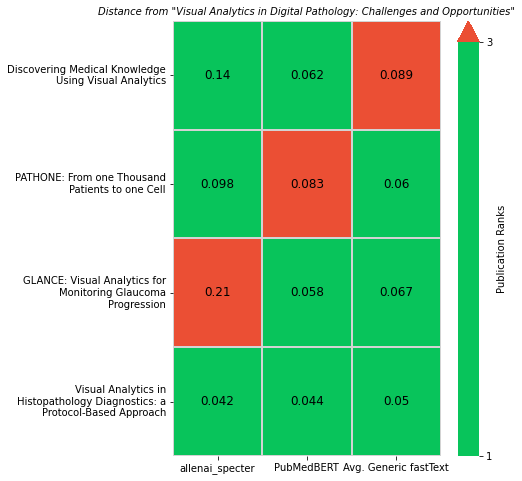

array([[ 3,  3, 12],
       [ 2, 51,  2],
       [34,  2,  3],
       [ 1,  1,  1]])

In [657]:
target_title1 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
B = create_rank_matrix(target_title1, 4, True)
B

In [658]:
# import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
# models = ['all-mpnet-base-v2', 'allenai-specter', 'BioBERT', 'PubMedBert', 'BioWordVec',
#           'Generic fastText']
# rank_matrix = []
# dist_matrix = []
# count = 0
# all_cor_mat = []
# all_dist_mat = []
# # draw_plot(target_title3)
# for article in article_titles:
#     B = create_rank_matrix(article, K=5)
#     # x = A.mean(axis=0)
#     # all_dist_mat.append(x)
#     df = pd.DataFrame(B)
#     cor_B = df.corr(method="spearman")
#     all_cor_mat.append(cor_B)


#     dist_matrix.append(A)
#     rank_matrix.append(B)

In [659]:
# x = np.array(all_dist_mat).mean(axis=0)
# x

In [660]:
# all_cor_mat = np.array(all_cor_mat)
# x = np.mean(all_cor_mat, axis=0)
# y = pd.DataFrame(x, columns=['all-mpnet-base-v2', 'allenai-specter', 'BioBERT', 'PubMedBert', 'BioWordVec',
#                              'Generic fastText'])
# sns.heatmap(y, cmap="coolwarm", mask=np.triu(y), yticklabels=models, annot=y)



In [661]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biowordvec', 'generic_fast'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [662]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biobert', 'pubmedbert', 'biowordvec', 'generic_fast', 'tfidf',
#                               'bow'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [663]:
# a = np.array(8)
# A = np.append(a, B)
# A

In [664]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biobert', 'pubmedbert', 'biowordvec', 'generic_fast'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [665]:
def kClosest_high(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance.cosine(points[i], target),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    pt = []
    for i in range(K):
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        # pt.append(points[d[i]["second"]])
    return dict(zip(position, dist))

In [666]:
def load_points(model, article, k):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)
    target = data[article]
    articles_title = list(data.keys())
    corpus_embedding = list(data.values())
    closest_points = kClosest_high(corpus_embedding, target, k)
    near_values = {}
    for k in closest_points.keys():
        if closest_points[k] != 0:
            near_values[articles_title[k]] = closest_points[k]
    return near_values

In [667]:
def generate_rank_matrix(target_title, K, drawplot=False):
    models = ['allenai_specter', 'all_mpnet_base_v2', 'pubmedbert', 'biowordvec',
              'generic_fasttext', 'tfidf', 'bow']
    model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
                   'Avg. Generic fastText', 'TFIDF', 'BOW']
    # models = ['biowordvec','generic_fasttext']
    # model_names = ['BioWordVec','Generic fastText']
    # models = ['allenai_specter','all_mpnet_base_v2']
    # model_names = ['allenai_specter','all_mpnet_base_v2']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    articles_from_models = [r for x in list(points.values()) for r in x]

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    # if target_title in articles_from_models:
    #     articles_from_models.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in articles_from_models:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 50)) for l in articles_from_models]
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                         cbar_kws={'label': 'Publication Ranks',
                                   'extend': 'max',
                                   'ticks': [1, 2]},
                         cmap=my_cmap, vmin=1, vmax=2, cbar=True, ax=ax,
                         annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                         linecolor='lightgray')
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([1, 2])
        colorbar.set_ticklabels(['1', '2'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

In [668]:
import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
          'Avg. Generic fastText', 'TFIDF', 'BOW']
model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
               'Avg. Generic fastText', 'TFIDF', 'BOW']
rank_matrix = []
dist_matrix = []
count = 0
all_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = generate_rank_matrix(article, K=6, drawplot=False)
    df = pd.DataFrame(B)

    all_mat.append(df)

In [ ]:
R = np.mean(np.array(all_mat), axis=0)
R

<AxesSubplot:>

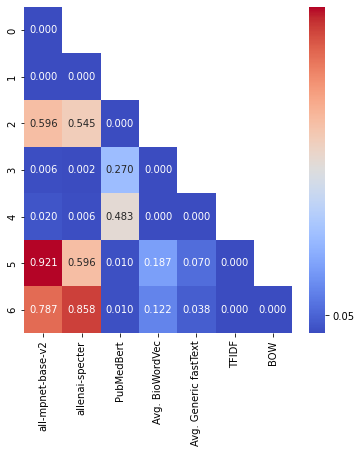

In [669]:
from scipy.stats import spearmanr

pvalues = []
main = []
for i in range(len(model_names)):
    for j in range(len(model_names)):
        rho, pr = spearmanr(R[:, i], R[:, j])
        pvalues.append(pr)
        if j == len(model_names) - 1:
            main.append(pvalues)
            pvalues = []
df1 = pd.DataFrame(main, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, cmap="coolwarm", mask=np.triu(df1), annot=True, fmt='.3f', cbar_kws={'ticks': [0.05]})


<AxesSubplot:>

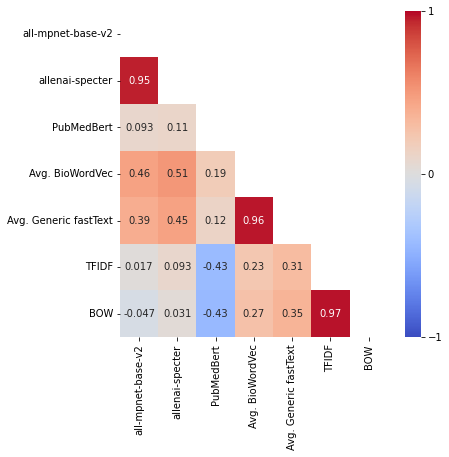

In [670]:
import pandas as pd

df = pd.DataFrame(R, columns=['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
                              'Avg. Generic fastText', 'TFIDF', 'BOW'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r), annot=my_r, cbar_kws={'ticks': [-1, 0, 1]}, cbar=True, vmin=-1,
            vmax=1)

In [488]:
import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
          'Avg. Generic fastText', 'TFIDF', 'BOW']
model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
               'Avg. Generic fastText', 'TFIDF', 'BOW']
rank_matrix = []
dist_matrix = []
count = 0
all_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = generate_rank_matrix(article, K=6, drawplot=False)
    df = pd.DataFrame(B)
    all_mat.append(df)

In [490]:
R = np.mean(np.array(all_mat), axis=0)
R

array([[ 0.        ,  6.57627119, 50.11016949, 21.18644068, 21.44915254,
        20.77118644, 27.6440678 ],
       [ 1.        ,  9.84745763, 57.63983051, 25.63559322, 27.14830508,
        30.79237288, 36.19915254],
       [ 2.        , 10.61864407, 62.84745763, 35.26271186, 34.51694915,
        35.43644068, 39.01694915],
       [ 3.        , 17.05508475, 73.52542373, 39.27966102, 37.26694915,
        39.78389831, 46.27542373],
       [ 4.        , 15.51271186, 67.19067797, 38.23305085, 40.28389831,
        37.52118644, 44.6059322 ],
       [ 6.22457627,  0.        , 50.45762712, 17.97881356, 19.34745763,
        16.88559322, 22.66949153],
       [ 9.37288136,  1.        , 57.70338983, 24.02542373, 26.12288136,
        25.44915254, 29.51271186],
       [13.18644068,  2.        , 60.97881356, 25.91949153, 25.86016949,
        23.63983051, 28.1440678 ],
       [14.8940678 ,  3.        , 60.98728814, 32.66949153, 32.59745763,
        32.28813559, 37.11016949],
       [16.99152542,  4.    

<AxesSubplot:>

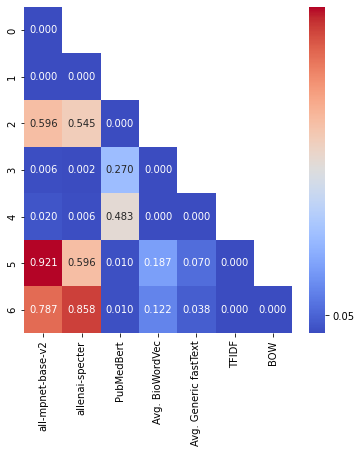

In [495]:
from scipy.stats import spearmanr

pvalues = []
main = []
for i in range(len(model_names)):
    for j in range(len(model_names)):
        rho, pr = spearmanr(R[:, i], R[:, j])
        pvalues.append(pr)
        if j == len(model_names) - 1:
            main.append(pvalues)
            pvalues = []
df1 = pd.DataFrame(main, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, cmap="coolwarm", mask=np.triu(df1), annot=True, fmt='.3f', cbar_kws={'ticks': [0.05]})


<AxesSubplot:>

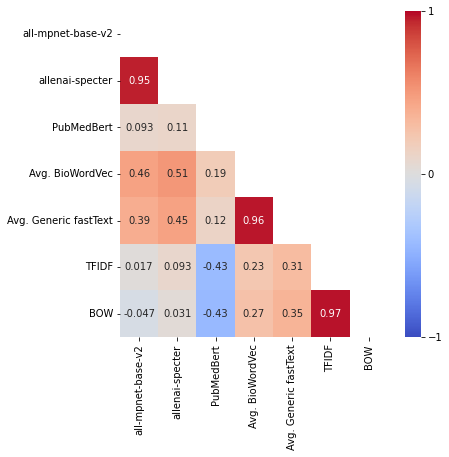

In [493]:
import pandas as pd

df = pd.DataFrame(R, columns=['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
                              'Avg. Generic fastText', 'TFIDF', 'BOW'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r), annot=my_r, cbar_kws={'ticks': [-1, 0, 1]}, cbar=True, vmin=-1,
            vmax=1)